<a href="https://colab.research.google.com/github/aadi-kanwar/Earthquake-Prediction/blob/main/Earthquake_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries & Dependencies

In [10]:
!pip install squarify
!pip install plotly

In [11]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
import plotly.express as px       ## data visualization & graphical plotting
import squarify                   ## Treemap plots

%matplotlib inline
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

pd.options.display.float_format = '{:.2f}'.format  ## limiting the decimals in the output to 2

import warnings                    ## Filter warnings
warnings.filterwarnings('ignore')

In [12]:
## Load the dataset
df = pd.read_csv('/content/earthquake_1995-2023.csv')

## Check a few records in the dataset that we just loaded
df.head(5)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.50,16-08-2023 12:47,7,4,green,0,657,us,114,7.18,25.00,mww,192.96,-13.88,167.16,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.50,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.68,40.00,mww,69.73,12.81,-88.13,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.60,17-07-2023 03:05,7,5,green,0,899,us,70,1.63,28.00,mww,171.37,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.20,16-07-2023 06:48,6,6,green,1,860,us,173,0.91,36.00,mww,32.57,54.38,-160.70,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.30,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.88,172.80,Mi,21.00,54.49,-160.80,Alaska Peninsula,NaN,NaN


In [15]:
## Check the dataset shape, rows, columns, duplicate entries & missing values
print(f'Number of records (rows) in the dataset are: {df.shape[0]}')
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')
print(f'Number of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'Number missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 1000
Number of features (columns) in the dataset are: 19
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 1622


In [16]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
alert,551
location,6
continent,716
country,349


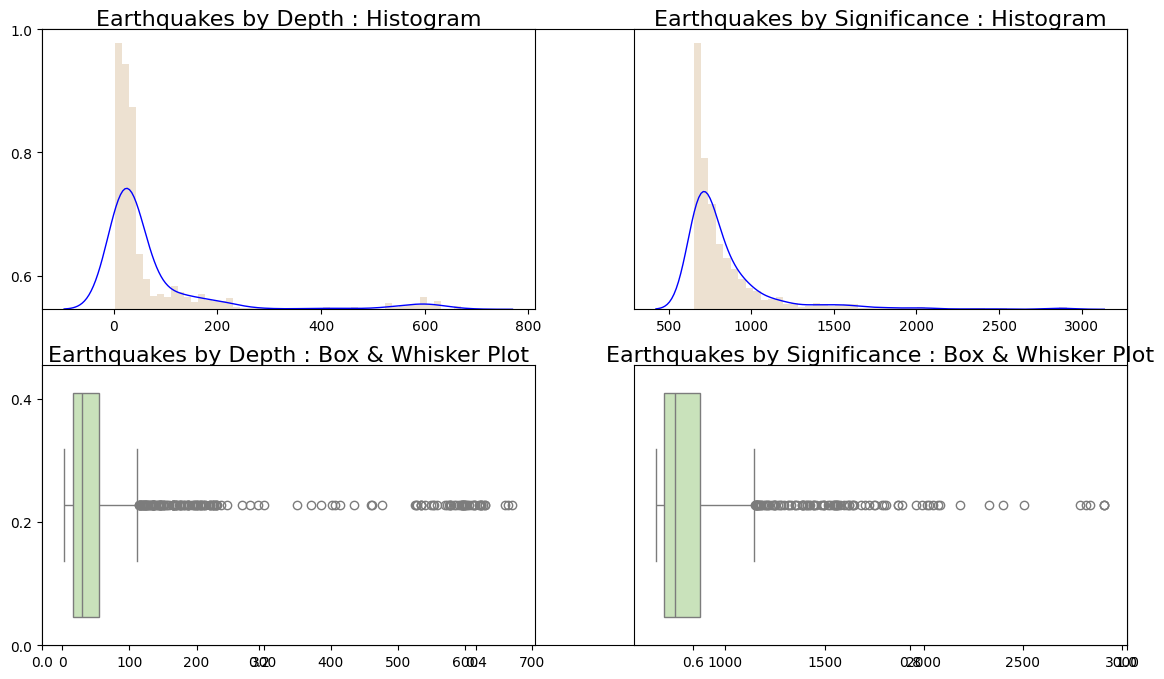

In [17]:
## Let's understand the patterns in earthquake depth and significance
## We'll use histograms and box & whisker plots to identify the trend

plt.subplots(figsize=(14,8))

plt.subplot(2,2,1)
plt.title('Earthquakes by Depth : Histogram', pad=1, fontsize=16)
sns.distplot(df['depth'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,2)
plt.title('Earthquakes by Significance : Histogram', pad=1, fontsize=16)
sns.distplot(df['sig'], color="#D2B48C", kde_kws={'linewidth':1,'color':'b'})
plt.yticks([]), plt.ylabel(None), plt.xlabel(None)

plt.subplot(2,2,3)
plt.title('Earthquakes by Depth : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['depth'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.subplot(2,2,4)
plt.title('Earthquakes by Significance : Box & Whisker Plot', pad=1, fontsize=16)
sns.boxplot(df['sig'], color="#c7e9b4", orient='h')
plt.ylabel(None), plt.xlabel(None), plt.yticks([])

plt.show()

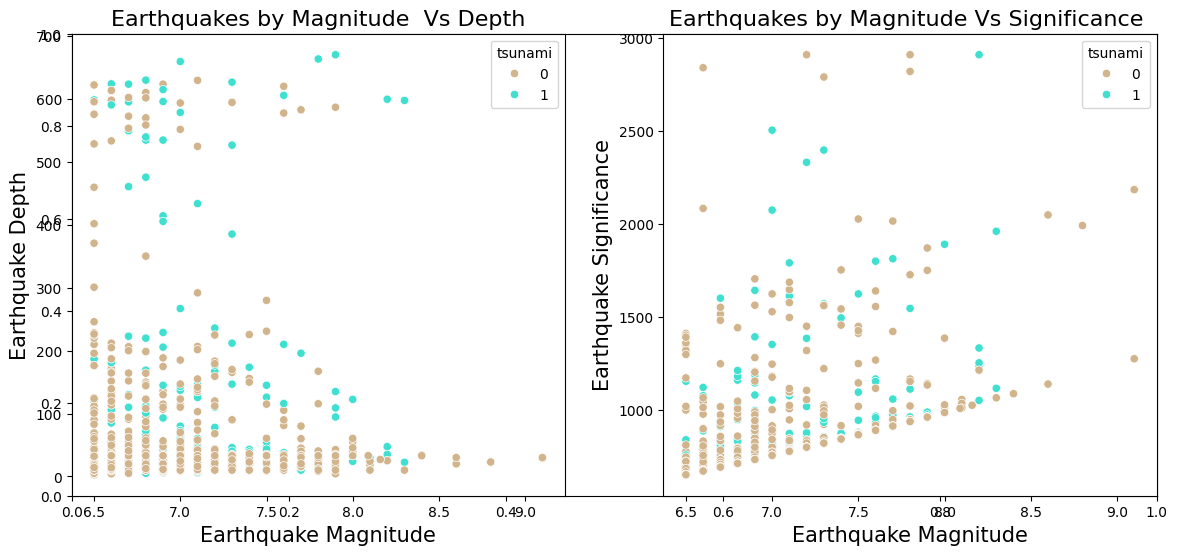

In [18]:
## Let's understand the relationship between magnitude vs depth and magnitude vs Significance

plt.subplots(figsize=(14,6))
my_pal = ('#D2B48C','#40E0D0')

plt.subplot(1,2,1)
plt.title('Earthquakes by Magnitude  Vs Depth',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='depth', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Depth', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.subplot(1,2,2)
plt.title('Earthquakes by Magnitude Vs Significance ',fontsize=16)
sns.scatterplot(data=df, x='magnitude', y='sig', hue='tsunami', palette=my_pal)
plt.ylabel('Earthquake Significance', fontsize=15)
plt.xlabel('Earthquake Magnitude', fontsize=15)

plt.show()

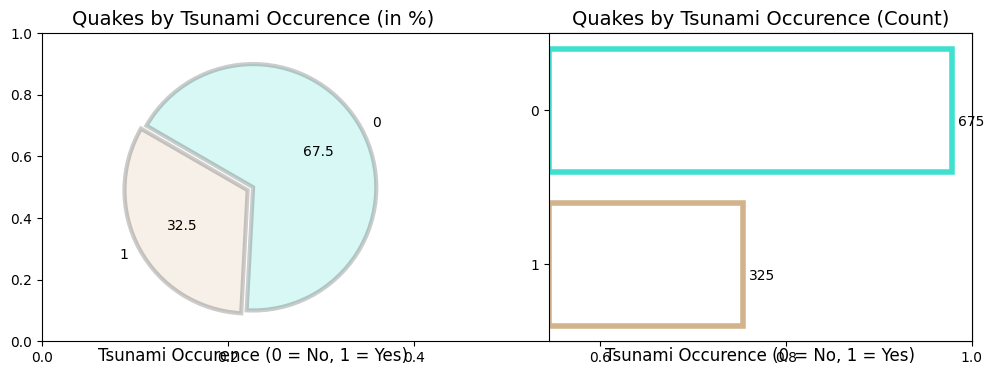

In [20]:
## Understand Tsunami Occurence during earthquake events

my_col = ('#40E0D0', '#D2B48C','#c7e9b4', '#EEE8AA','#00FFFF','#FAEBD7',
          '#FF6347', '#FAFAD2', '#D8BFD8','#F4A460','#F08080', '#EE82EE',
          '#4682B4','#6A5ACD', '#00C78C')

plt.subplots(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Quakes by Tsunami Occurence (in %)',fontsize=14)
my_xpl = [0.0, 0.05]
df['tsunami'].value_counts().plot(kind='pie', colors=my_col, explode=my_xpl, legend=None, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.2, 'edgecolor' : 'black','linewidth': 3, 'antialiased': True}, autopct='%1.1f')
plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)

plt.subplot(1,2,2)
plt.title('Quakes by Tsunami Occurence (Count)',fontsize=14)
ax = sns.countplot(y='tsunami', data=df, facecolor=(1,1,1,1), linewidth=4, edgecolor=sns.color_palette(my_col, 2), order=df['tsunami'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),  (p.get_x() + p.get_width() + 10, p.get_y()+0.5))

plt.xlabel('Tsunami Occurence (0 = No, 1 = Yes)',fontsize=12)
plt.xticks([]), plt.ylabel(None)

plt.show()

In [21]:
## Analyse the data by Year, Month, Day of the month, and Hour of the day.

## Make a new Date, Year, Month, Day, & Hour columns from the 'date_time' column for our analysis

df['Date'] = pd.to_datetime(df['date_time']).dt.date
df['Year'] = pd.to_datetime(df['date_time']).dt.year
df['Month'] = pd.to_datetime(df['date_time']).dt.month
df['Day'] = pd.to_datetime(df['date_time']).dt.day
df['Hour'] = pd.to_datetime(df['date_time']).dt.hour

## Check the new columns we have created in our dataset

df[['date_time', 'Date', 'Year', 'Month', 'Day', 'Hour']].head(5)

,date_time,Date,Year,Month,Day,Hour
0,16-08-2023 12:47,2023-08-16,2023,8,16,12
1,19-07-2023 00:22,2023-07-19,2023,7,19,0
2,17-07-2023 03:05,2023-07-17,2023,7,17,3
3,16-07-2023 06:48,2023-07-16,2023,7,16,6
4,16-07-2023 06:48,2023-07-16,2023,7,16,6


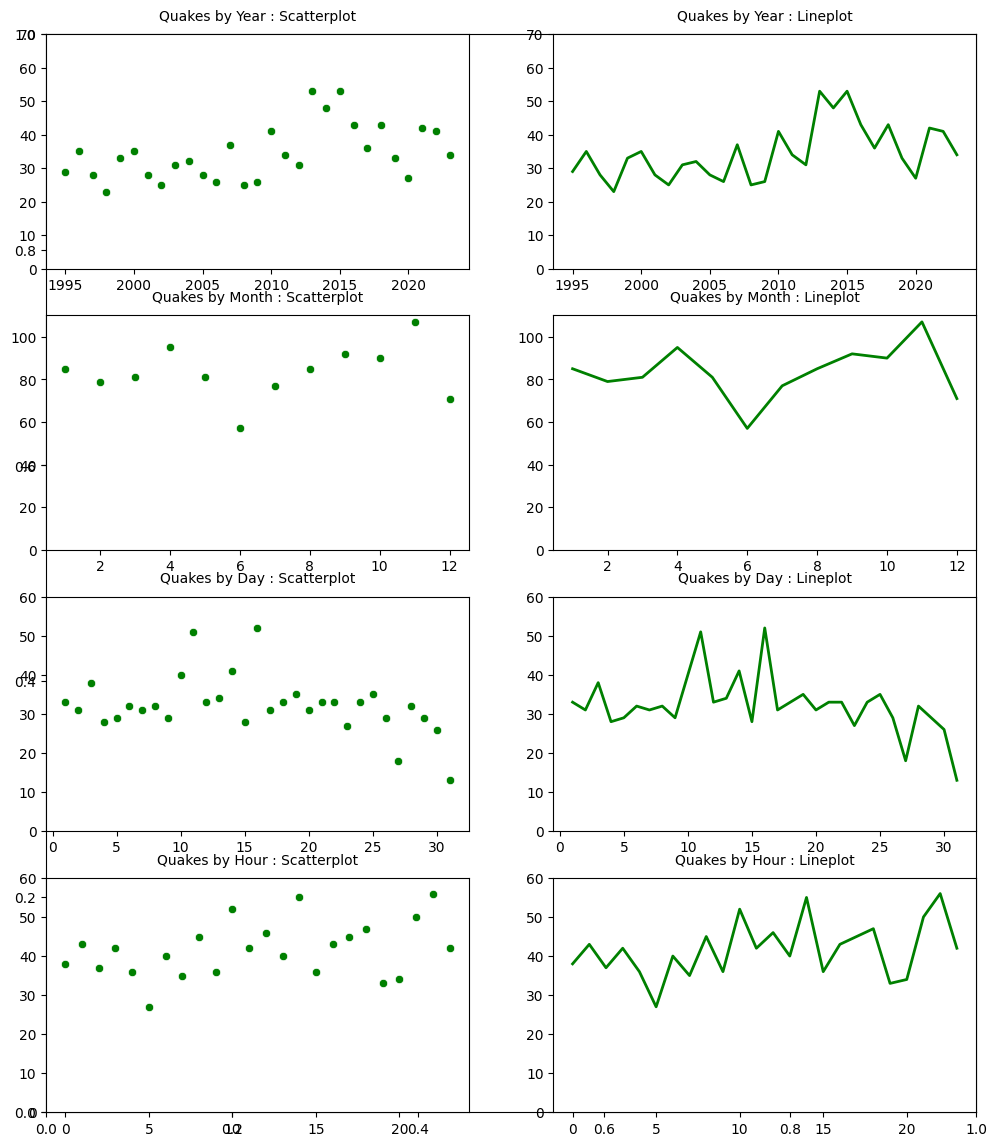

In [28]:
## Now, let's visualise the earthquake events by Year, Month, Day, and Hour with Scatterplots & Lineplots

plt.subplots(figsize=(12,14))

## By Year
###########

plt.subplot(421)
plt.title('Quakes by Year : Scatterplot', pad = 10, fontsize = 10)
sns.scatterplot(data = df['Year'].value_counts().sort_values(), color='g')
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

plt.subplot(422)
plt.title('Quakes by Year : Lineplot', pad = 10, fontsize = 10)
sns.lineplot(data = df['Year'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 70), plt.ylabel(None), plt.xlabel(None)

## By Month
###########

plt.subplot(423)
plt.title('Quakes by Month : Scatterplot', pad = 10, fontsize = 10)
sns.scatterplot(data = df['Month'].value_counts().sort_values(), color='g')
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

plt.subplot(424)
plt.title('Quakes by Month : Lineplot', pad = 10, fontsize = 10)
sns.lineplot(data = df['Month'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 110), plt.ylabel(None), plt.xlabel(None)

## By Day
###########

plt.subplot(425)
plt.title('Quakes by Day : Scatterplot', pad = 10, fontsize = 10)
sns.scatterplot(data = df['Day'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(426)
plt.title('Quakes by Day : Lineplot', pad = 10, fontsize = 10)
sns.lineplot(data = df['Day'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

## By Hour
###########

plt.subplot(427)
plt.title('Quakes by Hour : Scatterplot', pad = 10, fontsize = 10)
sns.scatterplot(data = df['Hour'].value_counts().sort_values(), color='g')
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.subplot(428)
plt.title('Quakes by Hour : Lineplot', pad = 10, fontsize = 10)
sns.lineplot(data = df['Hour'].value_counts().sort_values(), color='g', linewidth = 2)
plt.ylim(0, 60), plt.ylabel(None), plt.xlabel(None)

plt.show()

In [30]:
!pip install folium

In [31]:
import folium
from folium import plugins

In [32]:
## We will conclude the notebook by visualising the worldwide earthquake events by latitude and longitude
print("Earthquakes Across the World  -  Heat Map")
world = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=2)
heat_map = df[["latitude", "longitude"]].values
world.add_child(plugins.HeatMap(heat_map, min_opacity=0.3, radius=13))
world

Earthquakes Across the World  -  Heat Map
